Install Libraries

In [1]:
!pip install -q pandas scikit-learn matplotlib seaborn joblib


Imports

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import joblib


Create Synthetic Employee Dataset

In [3]:
# Step 3: Synthetic employee dataset
np.random.seed(42)
data = {
    'Work_Hours': np.random.randint(6, 12, 50),       # hours/day
    'Sleep_Hours': np.random.randint(5, 9, 50),      # hours/night
    'Tasks_Completed': np.random.randint(5, 20, 50),
    'Stress_Level': np.random.randint(1, 10, 50),    # self-reported 1-10
    'Job_Satisfaction': np.random.randint(1, 10, 50),
    'Wellness': np.random.choice(['Low','Medium','High'], 50)  # target
}
df = pd.DataFrame(data)
df.to_csv('employee_data.csv', index=False)
df.head()


,Work_Hours,Sleep_Hours,Tasks_Completed,Stress_Level,Job_Satisfaction,Wellness
0,9,6,9,5,8,Low
1,10,6,17,3,9,Low
2,8,6,6,8,4,High
3,10,5,19,6,1,Medium
4,10,6,9,3,1,Low


Preprocess Data & Split

In [4]:
# Features and target
X = df[['Work_Hours','Sleep_Hours','Tasks_Completed','Stress_Level','Job_Satisfaction']]
y = df['Wellness']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


Train Random Forest Model

In [5]:
# Train model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))



Accuracy: 0.3
              precision    recall  f1-score   support

        High       0.33      0.33      0.33         3
         Low       0.50      0.40      0.44         5
      Medium       0.00      0.00      0.00         2

    accuracy                           0.30        10
   macro avg       0.28      0.24      0.26        10
weighted avg       0.35      0.30      0.32        10



Visualizations

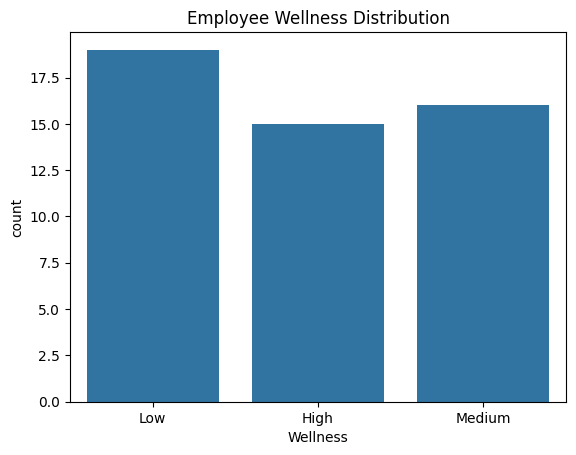

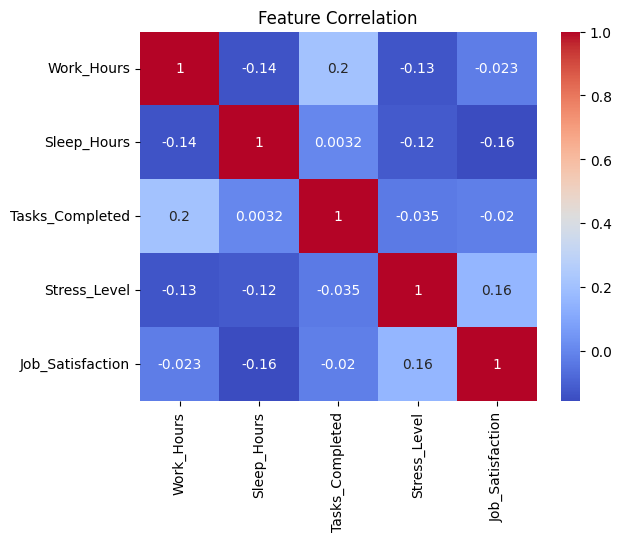

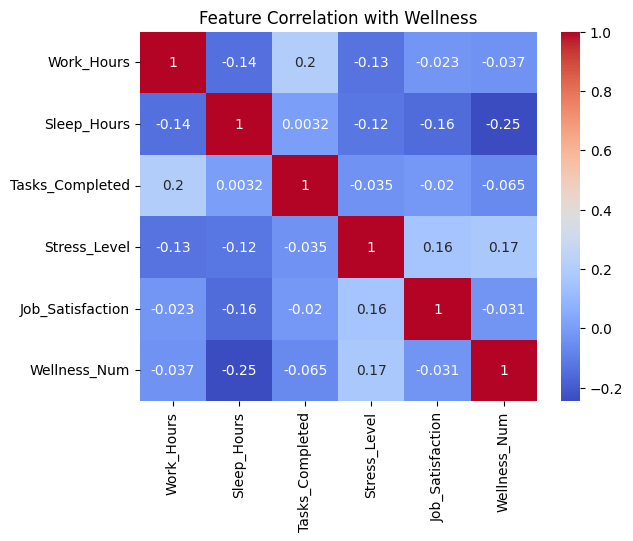

In [6]:
# 1️⃣ Wellness distribution
sns.countplot(x='Wellness', data=df)
plt.title("Employee Wellness Distribution")
plt.show()

# 2️⃣ Feature correlation (numeric only)
numeric_df = df[['Work_Hours','Sleep_Hours','Tasks_Completed','Stress_Level','Job_Satisfaction']]
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation")
plt.show()

# 3️⃣ Include Wellness as numeric
df['Wellness_Num'] = df['Wellness'].map({'Low':1, 'Medium':2, 'High':3})
numeric_df2 = df[['Work_Hours','Sleep_Hours','Tasks_Completed','Stress_Level','Job_Satisfaction','Wellness_Num']]
sns.heatmap(numeric_df2.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation with Wellness")
plt.show()


Predict New Employee

In [7]:
# Example new employee data
new_emp = pd.DataFrame({
    'Work_Hours': [9],
    'Sleep_Hours': [6],
    'Tasks_Completed': [12],
    'Stress_Level': [8],
    'Job_Satisfaction': [5]
})

# Scale using fitted scaler
new_emp_scaled = scaler.transform(new_emp)

# Predict
pred = model.predict(new_emp_scaled)
print("Predicted Wellness Level:", pred[0])


Predicted Wellness Level: High


Save Model & Scaler

In [12]:
# 1️⃣ Save the trained Random Forest model
joblib.dump(model, 'neuro_model.pkl')

# 2️⃣ Save the StandardScaler used for feature scaling
joblib.dump(scaler, 'scaler.pkl')

# 3️⃣ Save your dataset (if not already saved)
df.to_csv('employee_data.csv', index=False)

# 4️⃣ Download all files to your local computer
files.download('neuro_model.pkl')
files.download('scaler.pkl')
files.download('employee_data.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Strength / Stress Score

In [13]:
# Simple wellness scoring (bonus)
def wellness_score(emp_data):
    score = 0
    score += 10 - emp_data[3]  # lower stress better
    score += emp_data[1]       # sleep hours
    score += emp_data[2]/2     # tasks contribution
    return score

score = wellness_score([9,6,12,8,5])
print("Wellness Score (higher is better):", round(score,2))


Wellness Score (higher is better): 14.0
